## Paul's Place Intial Data Cleaning 

In [1]:
pip install pandas statsmodels


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import numpy as np

In [6]:
file_path = "Enroll_PP_DTA .xlsx"

df = pd.read_excel(file_path) 

In [7]:
df.head(25)

,Year,LSS,LSS Name,School,School Name,Race,Enrolled Count,Create Date
0,2020,30,Baltimore City,34,Charles Carroll Barrister Elementary,American Indian or Alaska Native,0,20200805
1,2020,30,Baltimore City,34,Charles Carroll Barrister Elementary,Asian,12,20200805
2,2020,30,Baltimore City,34,Charles Carroll Barrister Elementary,Black or African American,136,20200805
3,2020,30,Baltimore City,34,Charles Carroll Barrister Elementary,White,58,20200805
4,2020,30,Baltimore City,34,Charles Carroll Barrister Elementary,Hispanic/Latino of any race,143,20200805
5,2020,30,Baltimore City,34,Charles Carroll Barrister Elementary,All,350,20200805
6,2020,18,Saint Mary's,805,George Washington Carver Elementary,American Indian or Alaska Native,0,20200805
7,2020,18,Saint Mary's,805,George Washington Carver Elementary,Asian,0,20200805
8,2020,18,Saint Mary's,805,George Washington Carver Elementary,Black or African American,317,20200805
9,2020,18,Saint Mary's,805,George Washington Carver Elementary,White,87,20200805


In [8]:
df.describe()

,Year,LSS,School,Enrolled Count,Create Date
count,85.000000,85.000000,85.000000,85.000000,8.500000e+01
mean,2022.517647,23.647059,442.176471,108.823529,2.022543e+07
std,1.701622,6.025157,387.116359,140.794275,1.685064e+04
min,2020.000000,18.000000,34.000000,0.000000,2.020080e+07
25%,2021.000000,18.000000,34.000000,0.000000,2.021013e+07
50%,2023.000000,18.000000,805.000000,58.000000,2.023021e+07
75%,2024.000000,30.000000,805.000000,136.000000,2.024012e+07
max,2025.000000,30.000000,805.000000,598.000000,2.025012e+07


In [9]:
# Define different schools 

GWC_school = "George Washington Carver Elementary" 

CCB_school = "Charles Carroll Barrister Elementary" 

In [13]:
# Filter for the two schools (Not necessary but putting code for when we introduce other schools) 

filtered_df = df[df["School Name"]. isin([GWC_school, CCB_school])]

In [14]:
# Group- Year, School Name, sum enrollment across race 

grouped = filtered_df.groupby(["Year", "School Name"]) ["Enrolled Count"].sum().reset_index()

In [15]:
# Pivot 

pivot_df = grouped.pivot(index="Year", columns = "School Name", values="Enrolled Count" )

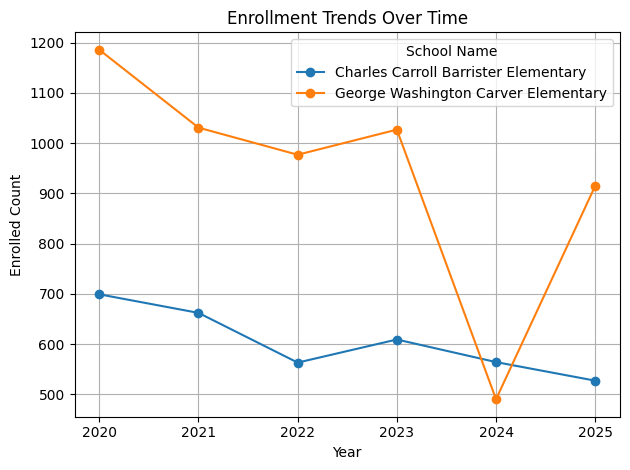

In [17]:
# Plot (Enrollment Trends Over Time) 

import matplotlib.pyplot as plt

pivot_df.plot(kind='line', marker='o')
plt.title("Enrollment Trends Over Time")
plt.ylabel("Enrolled Count")
plt.xlabel("Year")
plt.grid(True)
plt.legend(title="School Name")
plt.tight_layout()
plt.show()

### Enrollment Trends by Race (GWC) 

In [20]:
target_school = "George Washington Carver Elementary"

In [22]:
school_df = df[df["School Name"] == target_school]


In [23]:
grouped = school_df.groupby(["Year", "Race"])["Enrolled Count"].sum().reset_index()

In [24]:
pivot_df = grouped.pivot(index="Year", columns="Race", values="Enrolled Count")

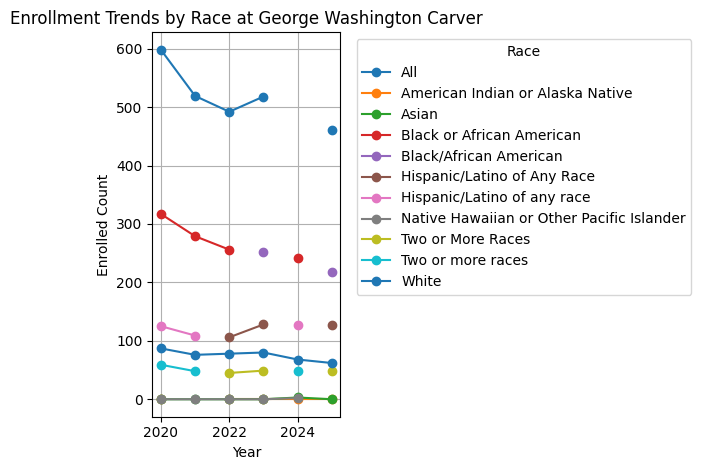

In [25]:
# Pivot
pivot_df = grouped.pivot(index="Year", columns="Race", values="Enrolled Count")

# Plot
pivot_df.plot(kind='line', marker='o')
plt.title(f"Enrollment Trends by Race at George Washington Carver")
plt.ylabel("Enrolled Count")
plt.xlabel("Year")
plt.grid(True)
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Enrollment Trends by Race (CCB)

In [26]:
target_school = "Charles Carroll Barrister Elementary"

In [27]:
school_df = df[df["School Name"] == target_school]


In [28]:
grouped = school_df.groupby(["Year", "Race"])["Enrolled Count"].sum().reset_index()

In [29]:
pivot_df = grouped.pivot(index="Year", columns="Race", values="Enrolled Count")

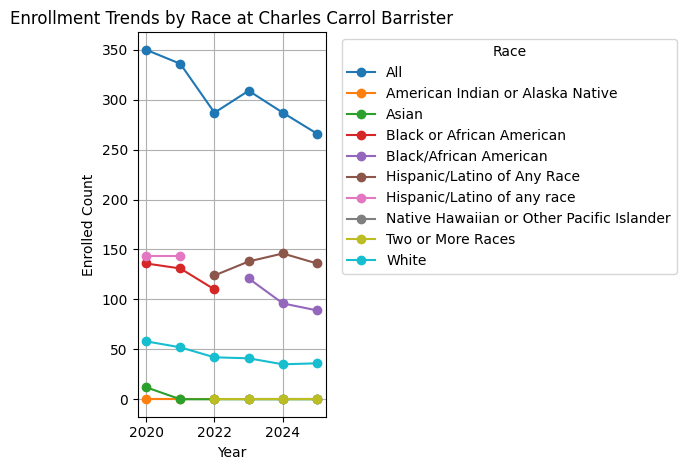

In [30]:
# Pivot
pivot_df = grouped.pivot(index="Year", columns="Race", values="Enrolled Count")

# Plot
pivot_df.plot(kind='line', marker='o')
plt.title(f"Enrollment Trends by Race at Charles Carrol Barrister")
plt.ylabel("Enrolled Count")
plt.xlabel("Year")
plt.grid(True)
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()